# Limits of Human Performance

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize

#### Suppress warnings for using np.exp() on large values during optimization:


In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Set default run configuration for plots:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rc('font', size=12)
plt.rc('axes', titlesize=14) 
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11) 
plt.rc('legend', fontsize=11) 

#### Input men's 100 m world records in seconds.
#### If two records were set in the same year, list only the latest (lowest):

#### This is an example of the Men's 100m run record. The limit can be tested by using any dataset as per the client's needs.

In [15]:
records = {2009: 9.58, 2008: 9.69, 2007: 9.74, 2005: 9.77, 2002: 9.78,
           1999: 9.79, 1996: 9.84, 1994: 9.85, 1991: 9.86, 1988: 9.92, 
           1983: 9.93, 1968: 9.95, 1960: 10, 1956: 10.1, 1936: 10.2, 
           1930: 10.3, 1921: 10.4, 1912: 10.6}

In [16]:
# Turn dictionary into a DataFrame:
df = pd.DataFrame(records.items(), columns=['year', 'time'])
df['years'] = df['year'] - 1912  # Years since first record.
df = df.sort_values('year').reset_index(drop=True)

In [17]:
display(df)

,year,time,years
0,1912,10.60,0
1,1921,10.40,9
2,1930,10.30,18
3,1936,10.20,24
4,1956,10.10,44
5,1960,10.00,48
6,1968,9.95,56
7,1983,9.93,71
8,1988,9.92,76
9,1991,9.86,79


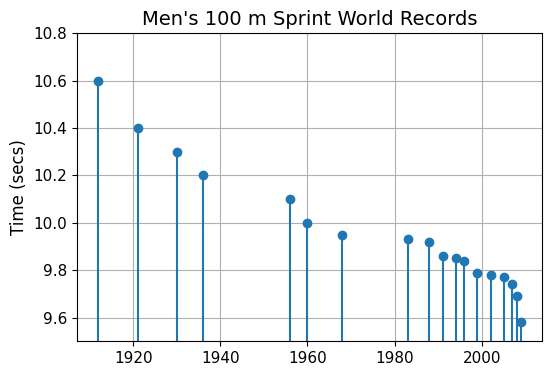

In [18]:
# Graph the world records:
plt.stem(df.year, df.time)
plt.title("Men's 100 m Sprint World Records")
plt.ylabel("Time (secs)")
plt.ylim(9.5, 10.8)
plt.grid(True)

In [8]:
def expo(x, a, b, c):
    """Return y values for exponential decay curve."""
    return a * np.exp(-b * x) + c

In [9]:
def optimize_curve_fit(a_func, x, y):
    """Return optimized parameters for curve fit."""
    params, covar = scipy.optimize.curve_fit(a_func, x, y, p0=None)
    return params

#### Generate datasets with and without Bolt's times (nB = No Bolt):


In [11]:
x_all, y_all = df.years, df.time
x_nB, y_nB = x_all[:-2], y_all[:-2]

In [12]:
# Find optimized parameters for fitting the curve to the points:
params_nB = optimize_curve_fit(expo, x_nB, y_nB)
params_all = optimize_curve_fit(expo, x_all, y_all)
print(f"Parameters without Bolt (a, b, c) = {params_nB}") 
print(f"   Parameters with Bolt (a, b, c) = {params_all}")

Parameters without Bolt (a, b, c) = [0.98795896 0.01631187 9.57391395]
   Parameters with Bolt (a, b, c) = [1.34836526 0.00941746 9.18654695]


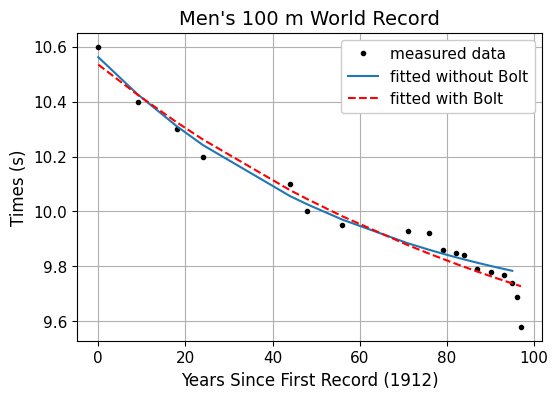

In [18]:
# Plot exponential curves for data with and without Bolt's times:
plt.plot(x_all, y_all, '.', label='measured data', c='k')
plt.plot(x_nB, expo(x_nB, *params_nB), 
         '-', label='fitted without Bolt')
plt.plot(x_all, expo(x_all, *params_all), '--', 
         label='fitted with Bolt', c='red')
plt.title("Men's 100 m World Record")
plt.xlabel('Years Since First Record (1912)')
plt.ylabel('Times (s)')
plt.grid(True)
plt.legend(framealpha=1);

In [19]:
# Extrapolate exponential curves to predict future performance:
x_extrap = np.arange(-20, 550)
y_nB_extrap = expo(x_extrap, *params_nB)  # Without Bolt.
y_B_extrap = expo(x_extrap, *params_all)  # With Bolt.

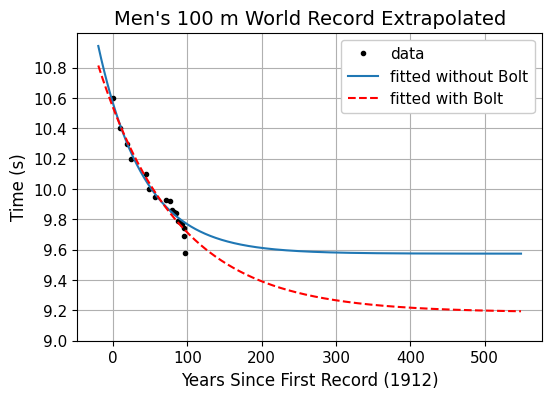

In [21]:
# Create a plot of the world record times and the extrapolated curves.
fig, ax = plt.subplots()
ax.plot(x_all, y_all, '.', label='data', c='k')
ax.plot(x_extrap, y_nB_extrap, '-', label='fitted without Bolt')
ax.plot(x_extrap, y_B_extrap, '--', c='red', label='fitted with Bolt')
ax.set(title="Men's 100 m World Record Extrapolated",
       xlabel='Years Since First Record (1912)',
       ylabel='Time (s)',
       yticks=np.arange(9.0, 11.0, 0.2))
ax.grid(True)
ax.legend(framealpha=1)

In [22]:
# Add a dotted horizontal line for each of Bolt's world record times.
bolt_times = {2009: 9.58, 2008: 9.69}
for year, time in bolt_times.items():
    ax.axhline(time, ls=':', linewidth=1.3, color='red')
    ax.text(0, time + 0.01, f"Bolt {year}", color='red',
            horizontalalignment='left', size=9)


In [23]:
# Define function and inverse function to permit a secondary x-axis for year:
axis_transform = lambda x_extrap: x_extrap + 1912
axis_inverse = lambda x_extrap: x_extrap - 1912
ax2 = ax.secondary_xaxis('top', functions=(axis_transform, axis_inverse))

print(f"\nMinimum predicted time without Bolt data = {min(y_nB_extrap):.2f} sec.")
print(f"Minimum predicted time with Bolt data =    {min(y_B_extrap):.2f} sec.\n")


Minimum predicted time without Bolt data = 9.57 sec.
Minimum predicted time with Bolt data =    9.19 sec.

